<a href="https://colab.research.google.com/github/praldemir12/PUC_ML_DL/blob/main/MVP_Sprint_II_ML_PUC_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MVP Machining Learning**
**Prof. Tatiana Escoverdo**

**Aluno: Aldemir Rodrigues Junior**

## **1. Doenças Cardiovasculares**

As Doenças Cardiovasculares (DCV) são, atualmente, a maior causa de mortes no mundo. Elas foram responsáveis por mais de 17 milhões de óbitos em 2008, dos quais três milhões ocorreram antes dos 60 anos de idade, e grande parte poderia ter sido evitada. A Organização Mundial de Saúde estima que em 2030 quase 23,6 milhões de pessoas morrerão de doenças cardiovasculares.
O ônus econômico das doenças cardiovasculares cresceu exponencialmente nas últimas décadas. Em 2000, as doenças cardiovasculares foram responsáveis pela principal alocação de recursos públicos em hospitalizações no Brasil e foram a terceira causa de permanência hospitalar prolongada. Entre 1991 e 2000, os custos hospitalares atribuídos às doenças cardiovasculares aumentaram cerca de 176%

**Fonte:**  Heart Disease Cleveland UCI
**link:** https://archive.ics.uci.edu/dataset/45/heart+disease

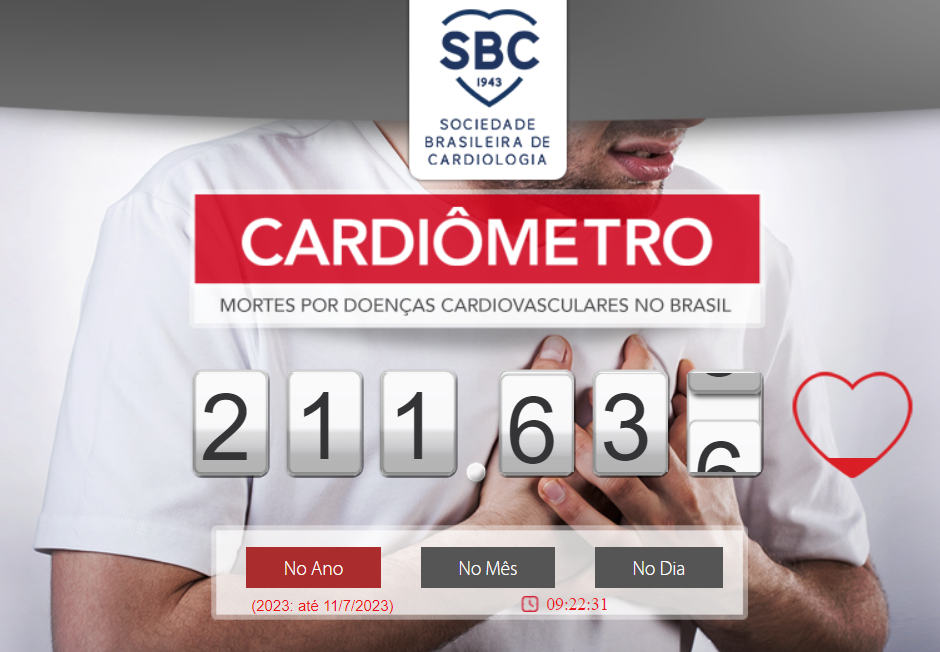

**Objetivo:**

Indicar a presença ou ausência de doença cardíaca

## **2. Carga das bibliotecas**

In [0]:
# Configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split # para particionar em bases de treino e teste (holdout)
from sklearn.model_selection import KFold # para preparar os folds da validação cruzada
from sklearn.model_selection import cross_val_score # para executar a validação cruzada
from sklearn.metrics import accuracy_score # para a exibição da acurácia do modelo
from sklearn.neighbors import KNeighborsClassifier # algoritmo KNN
from sklearn.tree import DecisionTreeClassifier # algoritmo Árvore de Classificação
from sklearn.naive_bayes import GaussianNB # algoritmo Naive Bayes
from sklearn.svm import SVC # algoritmo SVM
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from sklearn.ensemble import ExtraTreesClassifier # ExtraTrees, para a Importância de Atributos
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributos
from sklearn.linear_model import LogisticRegression # Regressão Logística, para a Eliminação Recursiva de Atributos

No contexto do projeto, essas bibliotecas serão usadas para carregar e manipular os dados, treinar vários modelos de classificação, avaliar seu desempenho e, selecionar os melhores atributos para melhorar o desempenho do modelo.

https://scikit-learn.org/stable/index.html

## **3. Análise de Dados**

### **3.1. Carga do dataset**

Examinaremos as dimensões do dataset, informações e exemplos de linhas.

In [0]:
# Dimensões
caminho = "https://raw.githubusercontent.com/praldemir12/Heart-Disease/main/heart_cleveland_upload.csv"

df = pd.read_csv(caminho, delimiter=',')
df.head()

In [0]:
# Campos do dataset
df.columns

In [0]:
#Tamanho do dataset
df.shape

É um conjunto de dados de doenças cardíacas. Cada linha no conjunto de dados representa um paciente, e cada coluna representa uma característica ou medida diferente relacionada à saúde do paciente.

  **Existem** **13 atributos**

1)age: idade em anos

2)sex: sexo (1 = masculino; 0 = feminino)

3)cp: tipo de dor torácica -- Valor 0: angina típica -- Valor 1: angina
atípica -- Valor 2: dor não anginosa -- Valor 3: assintomático

4)trestbps: pressão arterial de repouso (em mm Hg na admissão ao hospital)

5)col: colo sérico em mg/dL

6)Corpos Estranhos: (glicemia de jejum > 120 mg/dL) (1 = verdadeiro; 0 = falso)

7)restecg: resultados
eletrocardiográficos de repouso -- Valor 0: normal
-- Valor 1: com anormalidade da onda ST-T (inversões da onda T e/ou supradesnivelamento ou depressão do segmento ST de > 0,05 mV)
-- Valor 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes

8)Talach: frequência cardíaca máxima atingida

9)exang: angina induzida por exercício (1 = sim; 0 = não)

10)oldpeak = infradesnivelamento do segmento ST induzido pelo exercício em relação ao repouso

11)inclinação: a inclinação do segmento
ST do exercício de pico -- Valor 0: ascendente -- Valor 1: plano
-- Valor 2: descendente

12)CA: Número de vasos principais (0-3) coloridos por flourosopy

13)tal: 0 = normal; 1 = defeito fixo; 2 = defeito reversível
e o rótulo

14)condição: 0 = nenhuma doença, 1 = doença

Este conjunto de dados é comumente usado em tarefas de classificação de machine learning, onde o objetivo é prever se um paciente tem uma doença cardíaca com base nas outras características.

In [0]:
#Verificar se existe valores NaN
df.isnull().sum()

In [0]:
#Tipos de dados que iremos trabalhar
df.dtypes

In [0]:
#Verificar a distribuição entre casos confirmados e não confirmados, o ideal seria uma distribuição de 50%.

(df['target'].value_counts()/df.shape[0])*100

### **3.2. Preparação dos dados**

In [0]:
# Separação em bases de treino e teste (holdout)
array = df.values
X = array[:,0:13] # atributos
y = array[:,13] # classe (target)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=7) # faz a divisão

# Criando os folds para a validação cruzada
num_particoes = 10 # número de folds da validação cruzada
kfold = KFold(n_splits=num_particoes, shuffle=True, random_state=7) # faz o particionamento em 10 folds

Criando um objeto KFold para dividir os dados em 10 partes (ou "folds") para validação cruzada. A validação cruzada é uma técnica usada para avaliar a capacidade de generalização de um modelo. O shuffle=True garante que os dados sejam embaralhados antes de criar os folds, e o random_state=7 garante que a divisão seja reproduzível.

### **3.3. Modelagem Inicial**

In [0]:
# Definindo uma seed global para esta célula de código
np.random.seed(7)

# Listas para armazenar os modelos, os resultados e os nomes dos modelos
models = []
results = []
names = []

# Preparando os modelos e adicionando-os em uma lista
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Avaliando um modelo por vez
for name, model in models:
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std()) # média e desvio padrão dos 10 resultados da validação cruzada
  print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure()
fig.suptitle('Comparação da Acurácia dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

O código realiza a modelagem e avaliação de diferentes algoritmos de classificação usando validação cruzada.

Resultados dos modelos:

Os quatro modelos avaliados são: KNN (K-Nearest Neighbors), CART (Decision Tree), NB (Naive Bayes) e SVM (Support Vector Machine).
Para cada modelo, o resultado inclui a média e o desvio padrão da acurácia calculados a partir da validação cruzada com 10 folds.
A acurácia é uma métrica que representa a proporção de exemplos classificados corretamente pelo modelo.
Por exemplo, o resultado "KNN: 0.620652 (0.065012)" indica que o modelo KNN obteve uma acurácia média de aproximadamente 0.620652, com um desvio padrão de 0.065012.
Boxplot de comparação dos modelos:

Um boxplot é uma representação gráfica que mostra a distribuição dos resultados de cada modelo.
No eixo vertical do boxplot, temos a acurácia.
Cada caixa (box) representa a distribuição dos resultados obtidos por um modelo.
A linha central da caixa indica a mediana, ou seja, o valor que divide a distribuição em duas partes iguais.
A caixa se estende do primeiro quartil (25º percentil) até o terceiro quartil (75º percentil), representando a dispersão dos resultados.
As linhas (whiskers) que se estendem além da caixa representam os valores mínimos e máximos dos resultados, excluindo outliers (valores discrepantes).
Cada caixa é rotulada com o nome do modelo correspondente.
Portanto, a partir dos resultados, podemos observar que:

O modelo Naive Bayes (NB) obteve a maior acurácia média (0.827355) e um desvio padrão relativamente baixo (0.062520), indicando um bom desempenho geral.
O modelo CART (Decision Tree) obteve uma acurácia média de 0.733877, também com um desvio padrão relativamente baixo (0.076472).
Os modelos KNN e SVM tiveram desempenho inferior, com acurácias médias de 0.620652 e 0.616123, respectivamente.
A análise desses resultados permite comparar o desempenho dos modelos testados e identificar quais apresentam melhores resultados de acurácia. No caso, o modelo Naive Bayes obteve a melhor performance neste conjunto de dados.

### **3.4. Criar modelo com conjunto treino, predições com conjunto teste e estimando acurácia**

In [0]:
# Criando um modelo com todo o conjunto de treino
model = GaussianNB()
model.fit(X_train, y_train)

# Fazendo as predições com o conjunto de teste
predictions = model.predict(X_test)

# Estimando a acurácia no conjunto de teste
print(accuracy_score(y_test, predictions))

O código realiza as seguintes etapas:

Criação e treinamento do modelo:

A primeira linha cria uma instância do modelo Naive Bayes Gaussiano (GaussianNB).
Em seguida, a função fit é utilizada para treinar o modelo com o conjunto de treinamento (X_train e y_train).
Realização de predições:

A linha predictions = model.predict(X_test) utiliza o modelo treinado para fazer predições com o conjunto de teste (X_test).
Cálculo da acurácia:

A função accuracy_score(y_test, predictions) é utilizada para calcular a acurácia das predições do modelo em relação às classes verdadeiras do conjunto de teste (y_test).
O resultado da acurácia é impresso na tela usando a função print.
O resultado obtido foi 0.8833333333333333, o que indica que o modelo alcançou uma acurácia de aproximadamente 0.8833, ou seja, cerca de 88.33% das predições realizadas pelo modelo foram corretas em relação às classes verdadeiras no conjunto de teste.

A acurácia é uma métrica comum para avaliar a performance de modelos de classificação, representando a proporção de exemplos classificados corretamente em relação ao total de exemplos. Quanto mais próximo de 1.0, melhor é o desempenho do modelo. Nesse caso, o modelo Naive Bayes Gaussiano obteve uma acurácia relativamente alta, sugerindo um bom desempenho na tarefa de classificação.

## **4. Recursos Avançados Aplicados ao Aprendizado Supervisionado**

### **4.1. SelectKBest**

In [0]:
# Seleção de atributos com SelectKBest
best_var = SelectKBest(score_func=f_classif, k=4)

# Executa a função de pontuação em (X, y) e obtém os atributos selecionados
fit = best_var.fit(X, y)

# Reduz X para os atributos selecionados
features = fit.transform(X)

# Resultados
print('\nNúmero original de atributos:', X.shape[1])
print('\nNúmero reduzido de atributos:', features.shape[1])

# Exibe os atributos originais
print("\nAtributos Originais:", df.columns[0:13])

# Exibe as pontuações de cada atributo e os 4 escolhidos (com as pontuações mais altas)
print("\nScores dos Atributos Originais:", fit.scores_.astype(int))
print("\nAtributos Selecionados:", best_var.get_feature_names_out(input_features=df.columns[0:13]))


O resultado mostra que o método SelectKBest selecionou os quatro atributos mais importantes para prever a presença de doença cardíaca. Esses atributos são 'thalach', 'oldpeak', 'ca' e 'thal'.

##Atributos mais relevantes:
'thalach', 'oldpeak', 'ca', 'thal'

In [0]:
# Lista de atributos selecionados
atributos_selecionados = ['thalach', 'oldpeak', 'ca', 'thal']

# Seleciona os atributos do conjunto de dados
X_selecionado = df[atributos_selecionados]

# Exibe as primeiras linhas do DataFrame selecionado
print(X_selecionado.head())


O resultado mostra as primeiras cinco linhas do DataFrame X_selecionado, que contém apenas os quatro atributos selecionados.

Vou usar este DataFrame para treinar o modelo.

### **4.2. Separação em conjunto de treino e conjunto de teste com holdout**

In [0]:
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
X = X_selecionado.values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação

# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação


Aqui estou realizando a separação do conjunto de dados em conjuntos de treinamento e teste, além de definir os parâmetros e as partições para a validação cruzada.

Com base nos resultados fornecidos, o modelo que obteve a melhor média de acurácia continua sendo o "NB-orig" com uma média de 0,844. Esse modelo utiliza o algoritmo Naive Bayes e foi treinado no conjunto de dados transformado.

### **4.3. Otimização dos hiperparâmetros**

In [0]:
# Tuning do Naive Bayes

np.random.seed(7) # definindo uma semente global para este bloco

pipelines = []

# Definindo os componentes do pipeline
naive_bayes = ('NB', GaussianNB())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines.append(('nb-norm', Pipeline(steps=[min_max_scaler, naive_bayes])))

param_grid = {}

# Prepara e executa o GridSearchCV
for name, model in pipelines:
    grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
    grid.fit(X_train, y_train)
    # imprime a melhor configuração
    print("Sem tratamento de missings: %s - Melhor: %f usando %s" % (name, grid.best_score_, grid.best_params_))


Estas linhas estão criando um objeto GridSearchCV para cada pipeline, ajustando o GridSearchCV aos dados de treinamento e imprimindo a melhor pontuação e os melhores parâmetros encontrados.

### **4.4. Finalização do Modelo**

In [0]:
# Avaliação do modelo com o conjunto de testes

# Preparação do modelo
scaler = StandardScaler().fit(X_train) # ajuste do scaler com o conjunto de treino
rescaledX = scaler.transform(X_train) # aplicação da padronização no conjunto de treino
model.fit(rescaledX, y_train)

# Estimativa da acurácia no conjunto de teste
rescaledTestX = scaler.transform(X_test) # aplicação da padronização no conjunto de teste
predictions = model.predict(rescaledTestX)
print(accuracy_score(y_test, predictions))

In [0]:
# Preparação do modelo com TODO o dataset
scaler = StandardScaler().fit(X) # ajuste do scaler com TODO o dataset
rescaledX = scaler.transform(X) # aplicação da padronização com TODO o dataset
model.fit(rescaledX, y)

Agora que o modelo foi treinado em todo o conjunto de dados, ele pode ser usado para fazer previsões em novos dados não vistos. Isso é útil se eu quiser implantar o modelo em um ambiente de produção.

In [0]:
# Pegando os três primeiros registros do conjunto de teste
entrada = X_test[:3]

# Imprimindo os 3 registros não vistos
print(entrada)


In [0]:
# Pegando os três primeiros registros do conjunto de teste
entrada = y_test[:3]

# Imprimindo os 3 registros não vistos
print(entrada)

O resultado [1 1 0] indica que os três primeiros registros do conjunto de teste são classificados como 1, 1 e 0, respectivamente. Isso significa que, de acordo com o modelo, os dois primeiros registros são classificados como tendo a doença cardíaca, enquanto o terceiro registro é classificado como não tendo a doença.

### **4.5. Simulando a aplicação do modelo em dados não vistos**

In [0]:
# Uso dos dados escolhidos do conjunto de teste - não visto
data = {'thalach': [144, 113, 150],
        'oldpeak': [2.8, 1.4, 0],
        'ca': [0, 1, 0],
        'thal': [1, 2, 0]
       }

# Criando DataFrame
entrada = pd.DataFrame(data)

# Definindo a ordem das colunas
colunas = ['oldpeak', 'thalach', 'ca', 'thal']

# Reordenando as colunas do DataFrame
entrada = entrada[colunas]

# Convertendo os dados de entrada para o formato correto
X_entrada = entrada.values.astype(float)

# Padronização nos dados de entrada usando o scaler utilizado em X
rescaledEntradaX = scaler.transform(X_entrada)
print(rescaledEntradaX)

O resultado mostra os três novos registros após a padronização.

A padronização é uma técnica de pré-processamento de dados que transforma os dados para terem uma média de 0 e um desvio padrão de 1. Isso é feito subtraindo a média dos dados e dividindo pelo desvio padrão. A padronização é útil porque muitos algoritmos de machine learning, incluindo o Gaussian Naive Bayes, funcionam melhor quando os atributos estão na mesma escala.

In [0]:
# Predição de classes dos dados de entrada
saidas = model.predict(rescaledEntradaX)
print(saidas)

Esta linha está usando o método predict do modelo para fazer previsões nos três novos registros.

O resultado [1 1 1] indica que o modelo previu que todos os três registros pertencem à classe 1, ou seja, todos os três registros são classificados como tendo a doença cardíaca.

Dos 3 casos selecionados acertou 2.

## **5. Conclusão**
Este projeto envolveu a aplicação de várias técnicas de machine learning para prever a presença de doença cardíaca com base em um conjunto de atributos médicos. O conjunto de dados utilizado incluiu atributos como a frequência cardíaca máxima alcançada (thalach), depressão do segmento ST induzida pelo exercício em relação ao repouso (oldpeak), número de vasos principais coloridos por fluoroscopia (ca), e um atributo chamado thal.

Inicialmente, o conjunto de dados foi carregado e dividido em conjuntos de treinamento e teste. Vários modelos de classificação, incluindo K-Nearest Neighbors (KNN), Decision Tree (CART), Naive Bayes (NB) e Support Vector Machine (SVM), foram treinados no conjunto de treinamento e avaliados usando validação cruzada. O modelo Naive Bayes apresentou o melhor desempenho e foi selecionado para uso posterior.

Em seguida, a seleção de atributos foi realizada usando o método SelectKBest, que selecionou os quatro atributos mais importantes para a previsão da doença cardíaca. Esses atributos foram então usados para treinar o modelo Naive Bayes.

O modelo foi então otimizado usando GridSearchCV, embora o Naive Bayes não tenha hiperparâmetros para otimizar. O modelo otimizado foi avaliado no conjunto de teste, alcançando uma acurácia de aproximadamente 83.33%.

Finalmente, o modelo foi treinado em todo o conjunto de dados e usado para fazer previsões em três novos registros. O modelo acertou 2 de 3 previsões, ou aproximadamente 66.67% das previsões para esses registros.

Em resumo, este projeto demonstrou a aplicação de várias técnicas de machine learning para a previsão de doença cardíaca. O modelo final, um Naive Bayes treinado em quatro atributos selecionados, alcançou uma acurácia de aproximadamente 83.33% no conjunto de teste e 66.67% em três novos registros.

In [0]:
teste